<a href="https://colab.research.google.com/github/mohamedfadul/DeepSearch-Finding-Truncated-Differential-Trails-Using-Genetic-Algorithms-and-Deep-Learning/blob/main/ML_Random_Forest_Baseline_model_to_predict_trail_validity_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [4]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [35]:
!wget -O all_dataset_path.csv "https://drive.google.com/uc?export=download&id=1vG2C0PM3MXz7p_v5zMSjvodRsK6hbrnz"

--2024-07-03 04:50:13--  https://drive.google.com/uc?export=download&id=1vG2C0PM3MXz7p_v5zMSjvodRsK6hbrnz
Resolving drive.google.com (drive.google.com)... 108.177.97.102, 108.177.97.100, 108.177.97.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vG2C0PM3MXz7p_v5zMSjvodRsK6hbrnz&export=download [following]
--2024-07-03 04:50:13--  https://drive.usercontent.google.com/download?id=1vG2C0PM3MXz7p_v5zMSjvodRsK6hbrnz&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2547566 (2.4M) [application/octet-stream]
Saving to: ‘all_dataset_path.csv’

all_dataset_path.cs 100%[===================>]   2.43M  --

In [36]:
all_dataset = pd.read_csv ('all_dataset_path.csv')

In [37]:
all_dataset

,input16,input15,input14,input13,input12,input11,input10,input9,input8,input7,...,perm7,perm8,perm9,perm10,perm11,perm12,perm13,perm14,perm15,perm16
0,1,1,1,1,1,1,1,1,1,1,...,0.200000,0.533333,0.866667,0.4,0.600000,0.133333,1.0,0.666667,0.733333,0.933333
1,1,0,1,1,1,1,1,1,1,1,...,0.200000,0.533333,0.866667,0.4,0.600000,0.133333,1.0,0.666667,0.733333,0.933333
2,1,1,1,1,1,1,1,1,1,1,...,0.200000,0.533333,0.866667,0.4,0.600000,0.133333,1.0,0.666667,0.733333,0.933333
3,1,1,1,1,1,1,0,1,1,1,...,0.200000,0.533333,0.866667,0.4,0.600000,0.133333,1.0,0.666667,0.733333,0.933333
4,1,1,0,1,1,1,1,1,1,1,...,0.200000,0.533333,0.866667,0.4,0.600000,0.133333,1.0,0.666667,0.733333,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,1,1,1,1,1,1,1,1,0,...,0.466667,0.533333,1.000000,0.8,0.333333,0.933333,0.6,0.000000,0.866667,0.666667
11996,1,1,1,1,1,1,1,1,1,0,...,0.466667,0.533333,1.000000,0.8,0.333333,0.933333,0.6,0.000000,0.866667,0.666667
11997,1,1,1,1,1,1,1,1,1,1,...,0.466667,0.533333,1.000000,0.8,0.333333,0.933333,0.6,0.000000,0.866667,0.666667
11998,1,1,1,1,1,1,1,1,1,1,...,0.466667,0.533333,1.000000,0.8,0.333333,0.933333,0.6,0.000000,0.866667,0.666667


In [38]:
dataset = all_dataset.sample(frac=0.80,random_state=0)
test_dataset = all_dataset.drop(dataset.index)

In [39]:
dataset['sboxes'] = ((dataset['sboxes']/(dataset['round']*8)))
dataset['sboxes']

4954     1.225000
11999    0.937500
11041    0.140625
7532     2.718750
11966    0.343750
           ...   
6558     0.214286
11968    2.953125
859      0.675000
1883     0.979167
762      2.425000
Name: sboxes, Length: 9600, dtype: float64

In [40]:
test_dataset['sboxes'] = ((test_dataset['sboxes']/(test_dataset['round']*8)))
test_dataset['sboxes']

0        0.600000
13       1.900000
21       1.500000
25       2.600000
26       2.575000
           ...   
11969    1.500000
11979    0.296875
11982    2.734375
11997    0.156250
11998    0.875000
Name: sboxes, Length: 2400, dtype: float64

In [41]:
# Class count
count_class_0, count_class_1 = dataset.validity.value_counts()

# Divide by class
df_class_0 = dataset[dataset['validity'] == 0]
df_class_1 = dataset[dataset['validity'] == 1]

In [42]:
df_class_0.shape

(8741, 51)

In [43]:
df_class_1.shape

(859, 51)

In [44]:
#UnderSampling
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
train_dataset = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(train_dataset.validity.value_counts())

Random under-sampling:
validity
0    859
1    859
Name: count, dtype: int64


In [45]:
train_labels = train_dataset.pop("validity")
test_labels = test_dataset.pop("validity")

In [46]:
train_labels

4028     0
3242     0
1329     0
2471     0
716      0
        ..
8792     1
931      1
3529     1
11576    1
1883     1
Name: validity, Length: 1718, dtype: int64

In [47]:
test_labels

0        0
13       0
21       0
25       0
26       0
        ..
11969    0
11979    0
11982    0
11997    0
11998    1
Name: validity, Length: 2400, dtype: int64

In [48]:
train_dataset['round'] = (train_dataset['round'])/100

In [49]:
train_dataset['round']

4028     0.05
3242     0.08
1329     0.06
2471     0.07
716      0.05
         ... 
8792     0.05
931      0.05
3529     0.08
11576    0.08
1883     0.06
Name: round, Length: 1718, dtype: float64

In [50]:
test_dataset['round'] = (test_dataset['round'])/100

In [51]:
test_dataset['round']

0        0.05
13       0.05
21       0.05
25       0.05
26       0.05
         ... 
11969    0.08
11979    0.08
11982    0.08
11997    0.08
11998    0.08
Name: round, Length: 2400, dtype: float64

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [53]:
model=   RandomForestClassifier(n_estimators=1000)

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Fit the classifier model
model.fit(train_dataset, train_labels)

# Prediction
predictions = model.predict(test_dataset)

# Calculate Accuracy, Precision and Recall Metrics
accuracy= accuracy_score(predictions, test_labels)
precision = precision_score(predictions, test_labels)
recall = recall_score(predictions, test_labels)

In [55]:
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [56]:
import pandas as pd
d = {'Accuracy': [accuracy] , 'Precision': [precision], 'Recall' : [recall]}
df_model = pd.DataFrame(data=d)
df_model['Accuracy'] = accuracy
df_model['Precision'] = precision
df_model['Recall'] = recall

df_model

,Accuracy,Precision,Recall
0,0.972083,1.0,0.755474


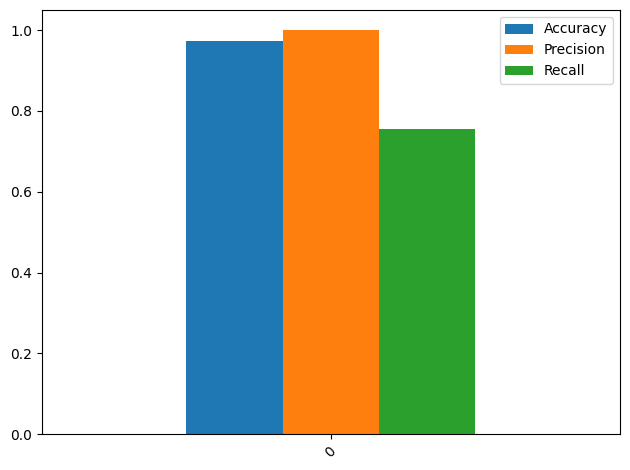

In [57]:
ax  = df_model.plot.bar(rot=45)
plt.tight_layout()

In [58]:
from sklearn.metrics import f1_score
f1_score(test_labels, predictions)

0.8607068607068608

In [59]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [60]:
y_preds = model.predict(test_dataset)
y_preds = np.round(predictions)
print("Classification Report: \n", classification_report(test_labels, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      2193
           1       0.76      1.00      0.86       207

    accuracy                           0.97      2400
   macro avg       0.88      0.98      0.92      2400
weighted avg       0.98      0.97      0.97      2400



In [ ]:
# Save the Random Forest model
import joblib
model_path = '/content/drive/My Drive/Colab Notebooks/ML Models for Trail Validity/random_forest_model_validity.joblib'
joblib.dump(model, model_path)

['/content/drive/My Drive/Colab Notebooks/ML Models for Trail Validity/random_forest_model_validity.joblib']